# Configuration

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

## The normal ecuation

In [2]:
import numpy as np

np.random.seed(42)

m = 100 # the number of instances
X = 2 * np.random.rand(m , 1) # column vector
y = 4 + 3 * X + np.random.rand(m, 1) # column vector


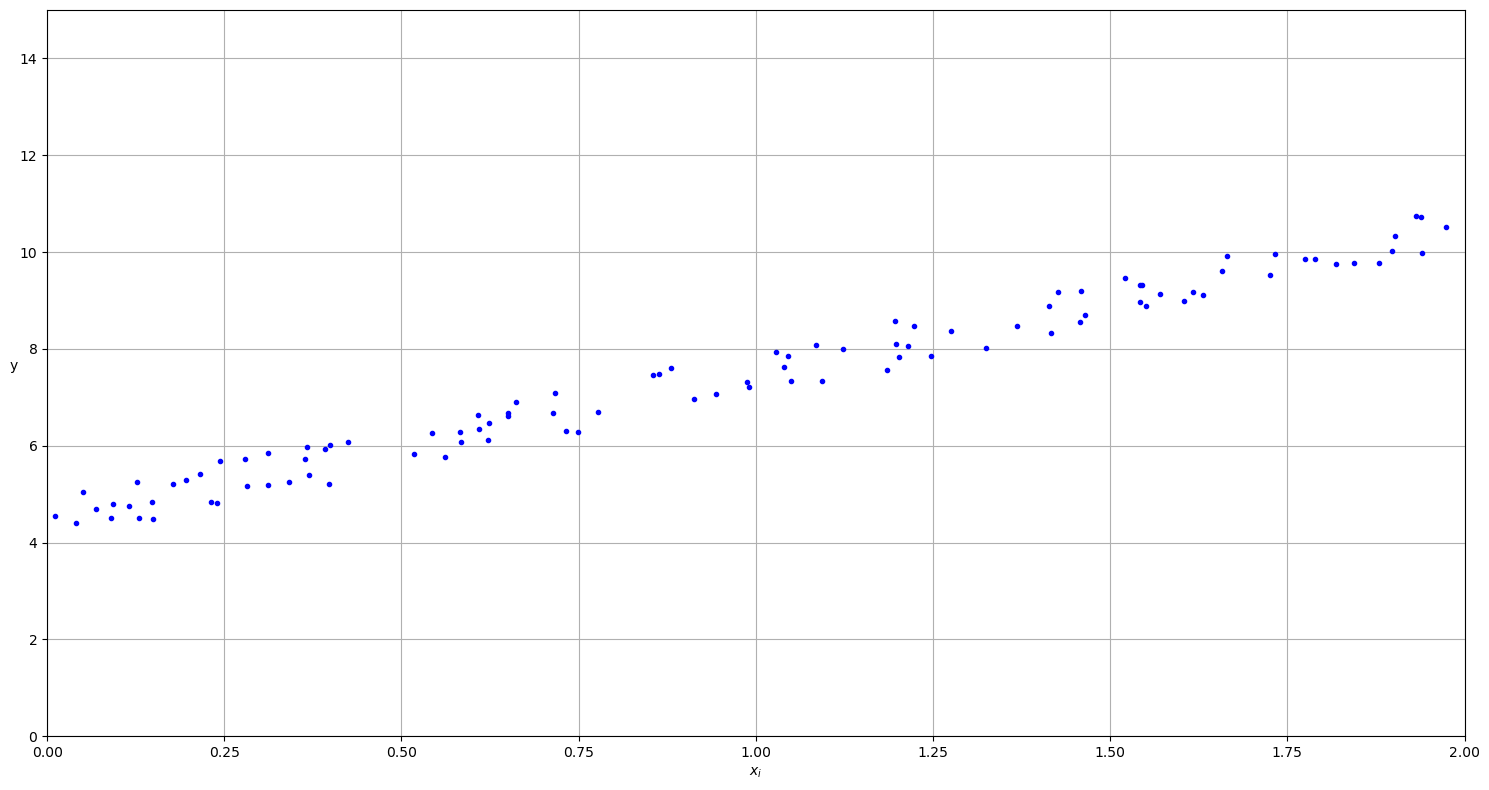

In [3]:
plt.figure(figsize = (15, 8))
plt.plot(X, y, "b.")
plt.ylabel("y", rotation = 0)
plt.xlabel("$x_i$")
plt.axis([0, 2., 0, 15])
plt.grid()
save_fig("generated_data")
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x_0 = 1 to each instances
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) 
y_pred = X_new_b @ theta_best
y_pred

array([[ 4.51359766],
       [10.48006601]])

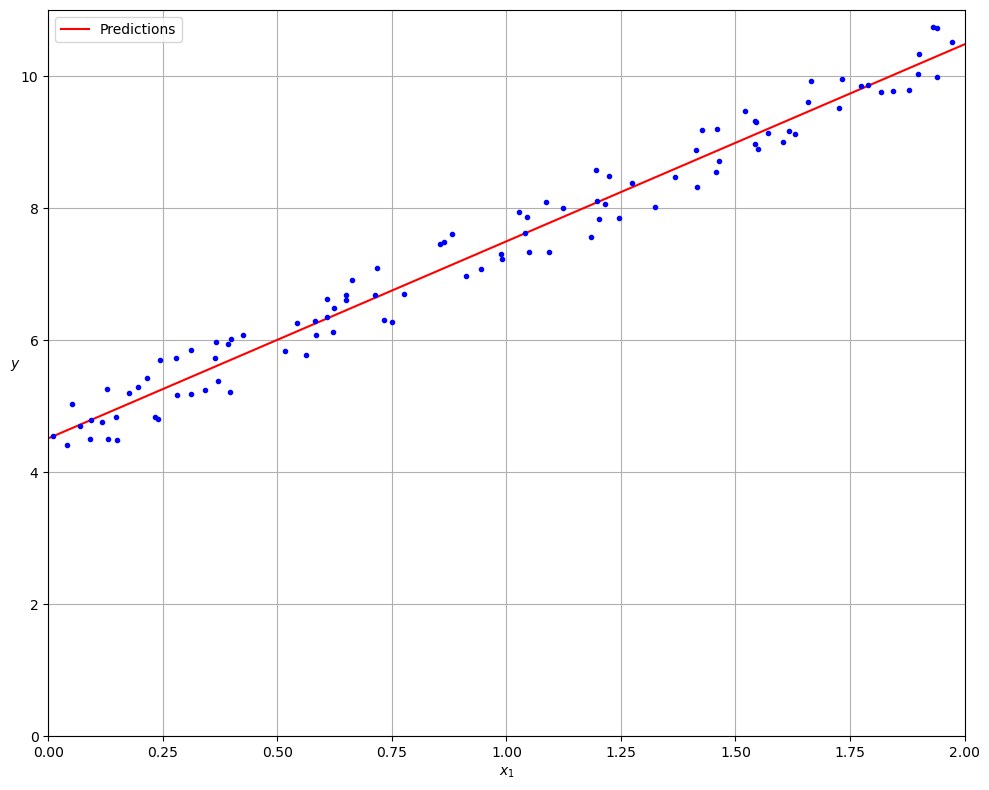

In [7]:
plt.figure(figsize = (10, 8))

plt.plot(X_new, y_pred, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2., 0, 11.])
plt.ylabel("$y$", rotation = 0)
plt.xlabel("$x_1$")
plt.grid()
plt.legend()
save_fig("linear_model_predictions")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [10]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6) # linear algebra "least squared" method
theta_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

# Gradient Descent

## Batch Gradient Descent 

In [12]:
eta = 0.01 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.48995432],
       [3.00410996]])

In [14]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

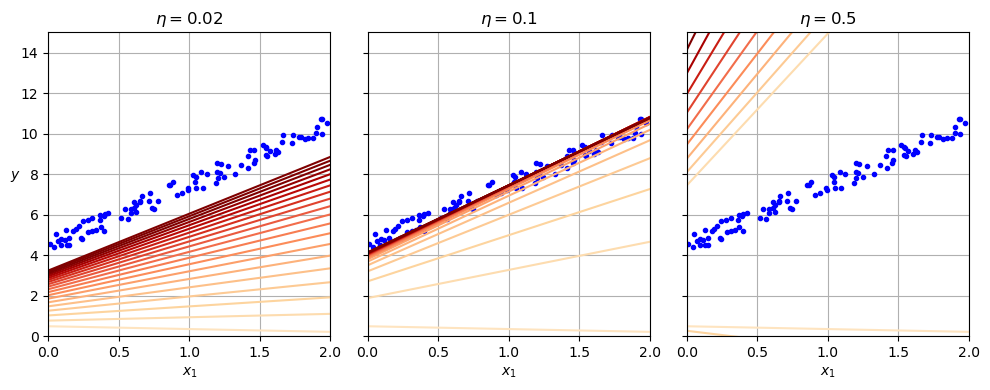

In [15]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent")
plt.show()

## Stochastic Gradient Descent

In [16]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, don't divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [17]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [18]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

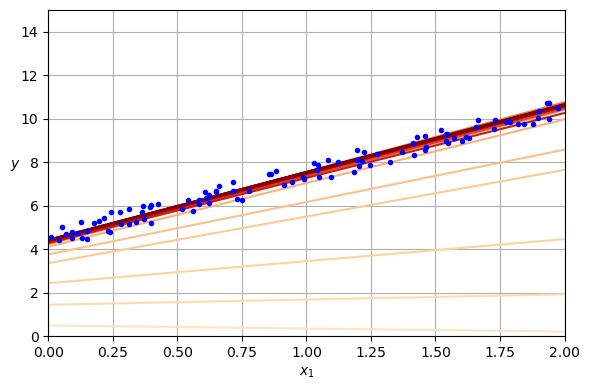

In [19]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01, n_iter_no_change = 100, random_state = 42)

sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D target

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

## Mini-batch Gradient Descent

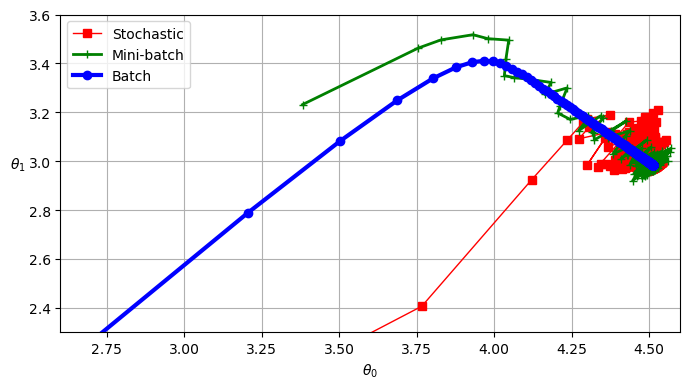

In [22]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.6])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()

# Polynomial Regression

In [23]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

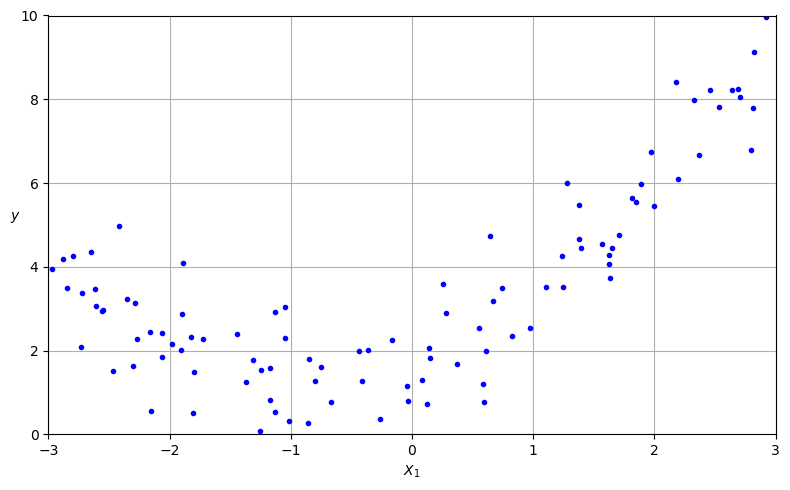

In [24]:
plt.figure(figsize = (8, 5))
plt.plot(X, y, "b.")

plt.ylabel("$y$", rotation = 0)
plt.xlabel("$X_1$")

plt.grid()
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [26]:
X[0]

array([-0.75275929])

In [27]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [29]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

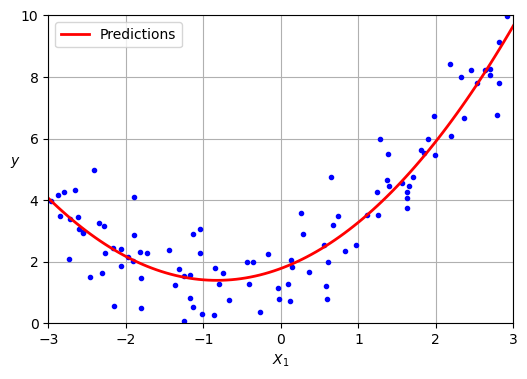

In [30]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize = (6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth = 2, label="Predictions")

plt.ylabel("$y$", rotation = 0)
plt.xlabel("$X_1$")

plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()

In [31]:
np.random.seed(42)

X1 = 6 * np.random.rand(m, 3) - 3
y1 = 1.5 * X1**3 + 0.5 * X1**2 +  + X1 + 2 + np.random.randn(m, 1)

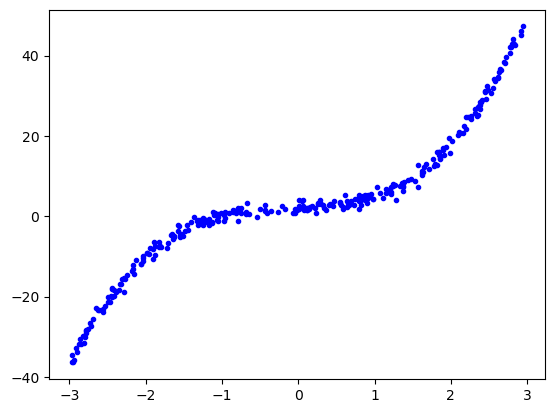

In [32]:
plt.plot(X1, y1, "b.")
plt.show()

In [33]:
poly_features_3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_3 = poly_features_3.fit_transform(X1)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_3, y1)

LinearRegression()

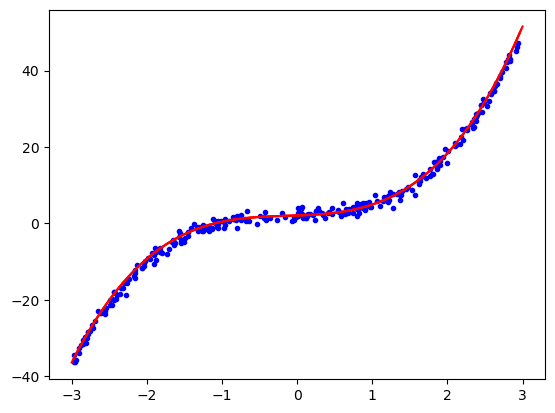

In [35]:
X_new_3 = np.linspace(-3, 3, 300).reshape(100, 3)
X_new_poly_3 = poly_features_3.transform(X_new_3)
y_new_3 = lin_reg.predict(X_new_poly_3)

plt.plot(X1, y1, "b.")
plt.plot(X_new_3, y_new_3, "r-")

plt.show()

# Learning Curves

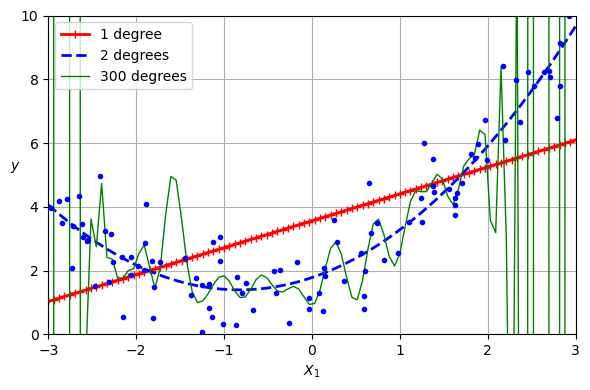

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize = (6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    poly_features = PolynomialFeatures(degree = degree, include_bias = False)
    standard_scaler = StandardScaler()
    lin_reg = LinearRegression()
    preprocessing = make_pipeline(poly_features, standard_scaler, lin_reg)
    preprocessing.fit(X, y)
    y_pred = preprocessing.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_pred, style, linewidth = width, label = label)

plt.plot(X, y, "b.", linewidth = 2)
plt.ylabel("$y$", rotation = 0)
plt.xlabel("$X_1$")
plt.legend(loc = "upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = "neg_root_mean_squared_error")

In [38]:
train_sizes

array([ 1,  2,  4,  6,  8, 10, 12, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 80])

In [39]:
train_errors = -train_scores.mean(axis = 1)
train_errors

array([-0.00000000e+00,  8.42462222e-16,  1.21917626e+00,  1.55444643e+00,
        1.67538750e+00,  1.66043001e+00,  1.87246874e+00,  1.77194988e+00,
        1.73293770e+00,  1.77993138e+00,  1.76856361e+00,  1.77297636e+00,
        1.80788097e+00,  1.75305712e+00,  1.75504512e+00,  1.76723624e+00,
        1.75137416e+00,  1.78154893e+00,  1.75109417e+00,  1.76356708e+00,
        1.74809325e+00,  1.76183606e+00,  1.76981557e+00,  1.74279296e+00,
        1.73842344e+00,  1.77957666e+00,  1.79762131e+00,  1.78590497e+00,
        1.76560991e+00,  1.74736661e+00,  1.75519418e+00,  1.75392236e+00,
        1.76470581e+00,  1.74127910e+00,  1.74945465e+00,  1.75076847e+00,
        1.74085617e+00,  1.73672095e+00,  1.73915788e+00,  1.73796725e+00])

In [40]:
valid_errors = -valid_scores.mean(axis = 1)
valid_errors

array([2.80211523, 2.4866149 , 3.10778145, 1.83476451, 1.81585796,
       1.84822263, 1.83766998, 1.76806648, 1.75211426, 1.7420777 ,
       1.74526237, 1.75197152, 1.76503282, 1.76326358, 1.7821654 ,
       1.77464973, 1.78066051, 1.74443062, 1.74714572, 1.75160803,
       1.75422075, 1.76072213, 1.75596944, 1.75917901, 1.75768614,
       1.75677089, 1.74969838, 1.74871877, 1.74622283, 1.74591716,
       1.74614881, 1.74620691, 1.74528147, 1.74536197, 1.74559165,
       1.74647787, 1.74586345, 1.74533141, 1.74588422, 1.74483238])

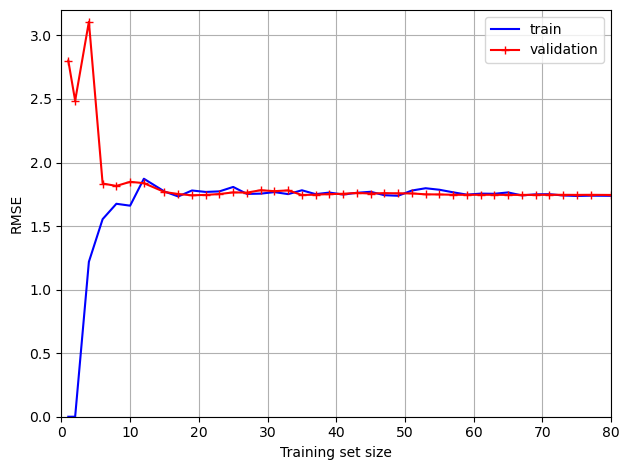

In [41]:
plt.plot(train_sizes, train_errors, "b-", label = "train")
plt.plot(train_sizes, valid_errors, "r-+", label = "validation")

plt.legend(loc = "upper right")
plt.ylabel("RMSE")
plt.xlabel("Training set size")
plt.axis([0, 80, 0, 3.2])
plt.grid()
save_fig("underfitting_learning_curves_plot")
plt.show()

In [42]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 10, include_bias = False),
    LinearRegression()
)

In [43]:
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes = np.linspace(0.01, 1, 40), cv = 5,
    scoring = "neg_root_mean_squared_error"
)

In [44]:
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

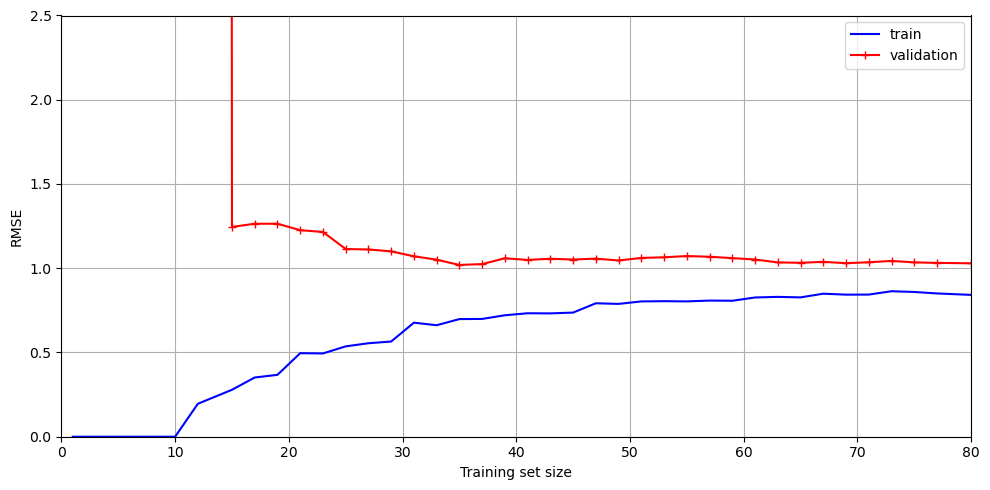

In [45]:
plt.figure(figsize = (10, 5))
plt.plot(train_sizes, train_errors, 'b-', label = "train")
plt.plot(train_sizes, valid_errors, 'r-+', label = "validation")

plt.legend(loc = "upper right")
plt.ylabel("RMSE")
plt.xlabel("Training set size")
plt.axis([0, 80, 0, 2.5])
plt.grid()
save_fig("learning_curves_plot")
plt.show()

# Regularized Linear Models

## Ridge Regression

In [46]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

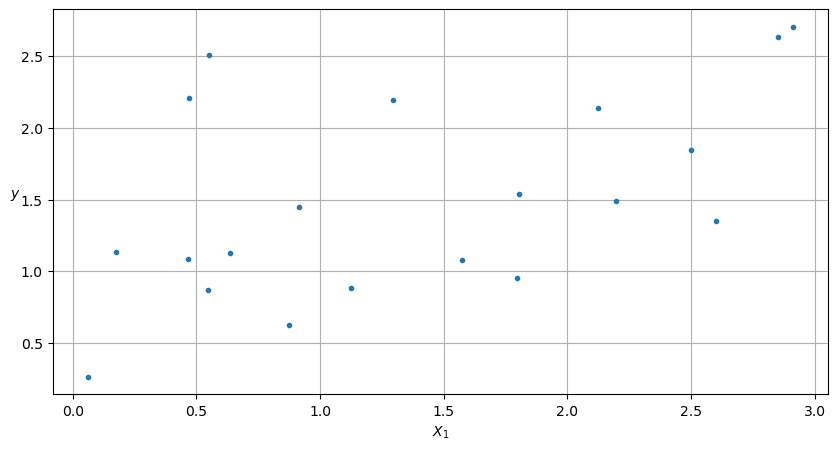

In [60]:
plt.figure(figsize = (10, 5))
plt.plot(X, y, '.')
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation = 0)
plt.grid()
plt.show()

In [62]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, 'b.', linewidth = 3)
    for alpha, style in zip(alphas, ('b:', 'g--', 'r-')):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree = 10, include_bias = False),
                StandardScaler(),
                model
            )
        
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth = 2, label=fr"$\alpha = {alpha}$")
    
    plt.legend("upper left")
    plt.xlabel("$X_1$")
    plt.axis([0, 3, 0, 3])
    plt.grid()

